In [7]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
dataset1 = pd.read_csv('/dataset-y.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [12]:
# Name:DHANAPPRIYA S
# Register Number:212224230056
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation here since it's a regression task
        return x

In [13]:
dhana = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(dhana.parameters(), lr=0.001)

In [20]:
# Name:DHANAPPRIYA S
# Register Number:212224230056
def train_model(dhana, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(dhana(X_train), y_train)
        loss.backward()
        optimizer.step()

        dhana.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [21]:
train_model(dhana, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 3404.466064
Epoch [200/2000], Loss: 2678.201416
Epoch [400/2000], Loss: 1614.495850
Epoch [600/2000], Loss: 737.879272
Epoch [800/2000], Loss: 452.866516
Epoch [1000/2000], Loss: 381.055786
Epoch [1200/2000], Loss: 286.692932
Epoch [1400/2000], Loss: 183.780273
Epoch [1600/2000], Loss: 93.340851
Epoch [1800/2000], Loss: 30.290104


In [22]:
with torch.no_grad():
    test_loss = criterion(dhana(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 3.463362


In [23]:
loss_df = pd.DataFrame(dhana.history)

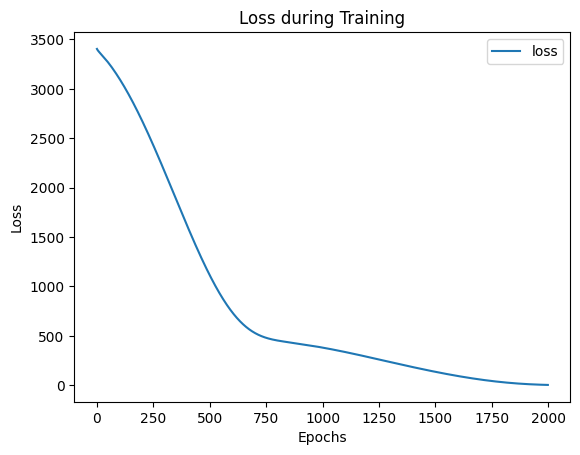

In [24]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [25]:
X_n1_1 = torch.tensor([[11]], dtype=torch.float32)
prediction = dhana(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 57.355037689208984
